# Generate Figures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = "/workspace/nflbigdatabowl2023"
sys.path.append(DIR)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from IPython.display import display

from src.visualization.interactive_pocket_area import (
    get_frame_plotter,
    get_play_pocket_and_timeline_plotter,
    get_play_pocket_and_timeline_plotter_multiple,
)
from src.visualization.formations import (
    plot_area_distributions,
    get_all_formation_distributions_plotter,
    get_clean_play_data,
    get_formation_distribution_plotter,
    get_play_metrics_with_area_data,
)
from src.visualization.helpers import unsnake
from src.visualization.logos import get_team_logos
from src.visualization.scatter import get_team_scatter_plotter, get_team_scatter_ranker

In [4]:
FIGPATH = "/workspace/nflbigdatabowl2023/data/figures"

In [5]:
team_logos = get_team_logos()

In [6]:
df_plays = pd.read_csv(f"{DIR}/data/raw/plays.csv")
df_plays = get_clean_play_data(df_plays)
df_tracking = pd.read_csv(f"{DIR}/data/processed/tracking_display.csv")
df_play_metrics = pd.read_csv(f"{DIR}/data/processed/play_metrics.csv")
df_play_metrics = get_play_metrics_with_area_data(df_play_metrics, df_plays)
df_areas = pd.read_csv(f"{DIR}/data/processed/pocket_areas.csv")
df_areas["pocket"] = df_areas["pocket"].apply(literal_eval)

## Figures

### Introduction

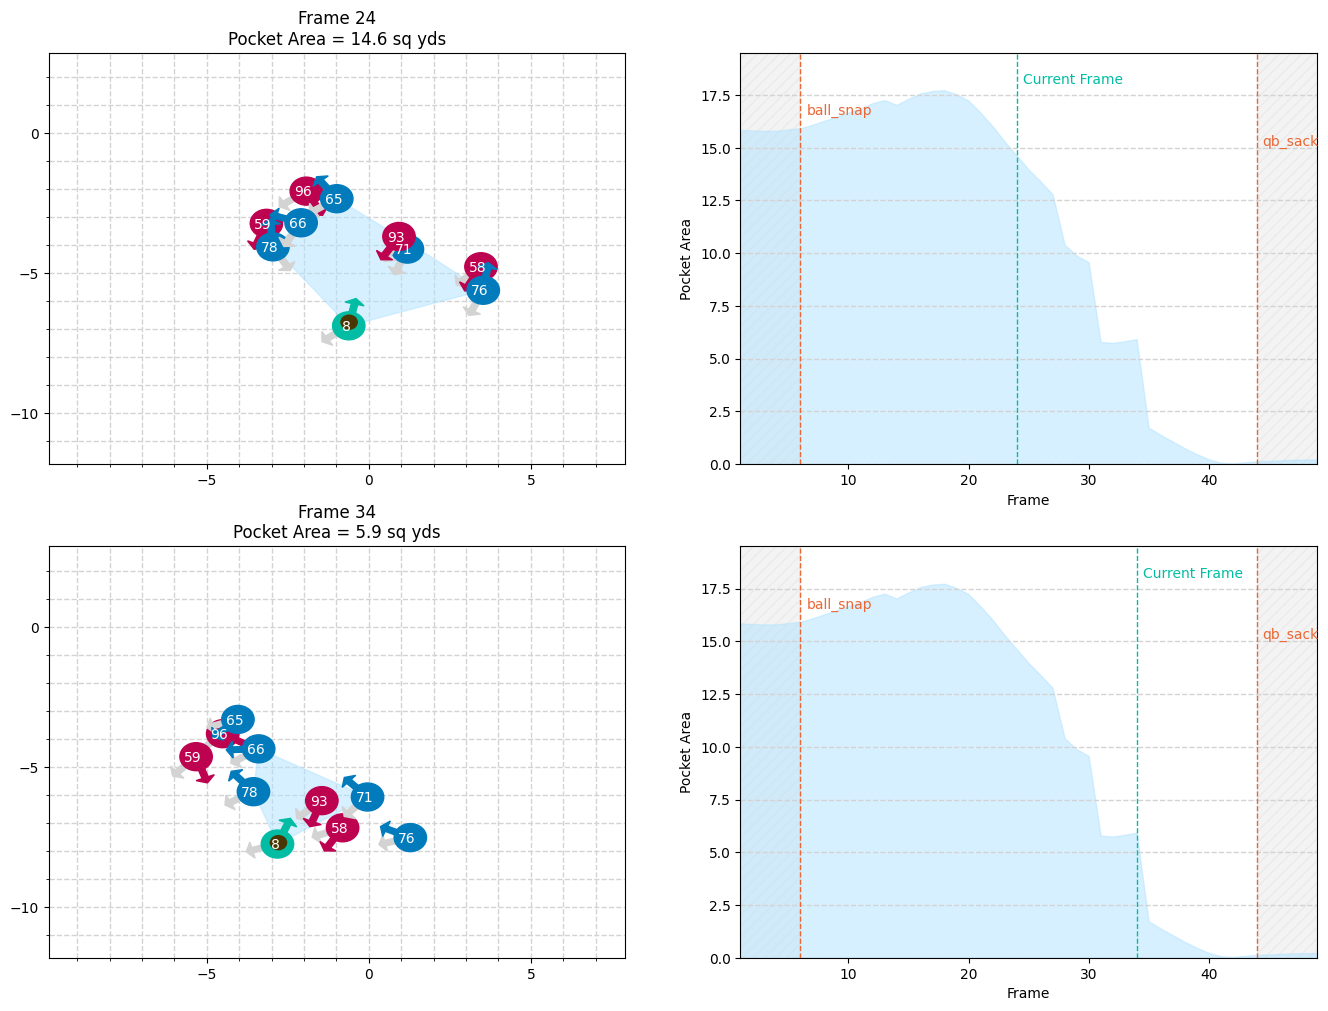

In [7]:
default_area = "adaptive_pocket_area"
play_query = "gameId == 2021091212 and playId == 421"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method=default_area)
plt.gcf().savefig(f"{FIGPATH}/figure_01.png")
plt.show()

### Voronoi

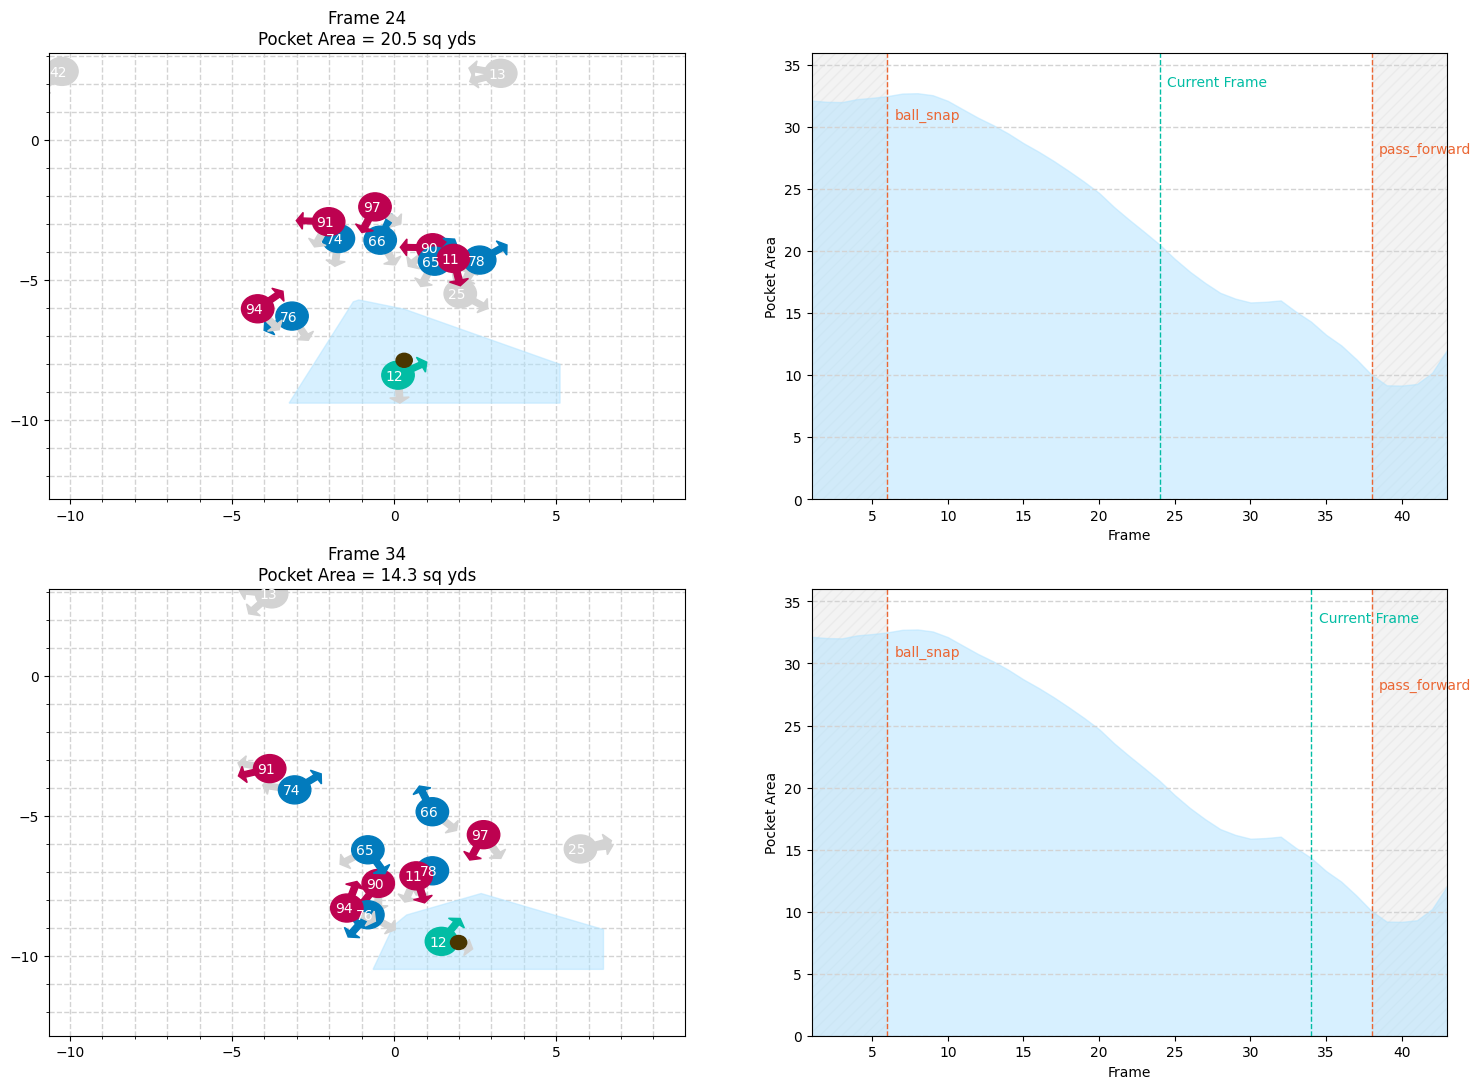

In [8]:
play_query = "gameId == 2021090900 and playId == 97"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method="voronoi_rushers_only")
plt.gcf().savefig(f"{FIGPATH}/figure_02.png")
plt.show()

### Adaptive

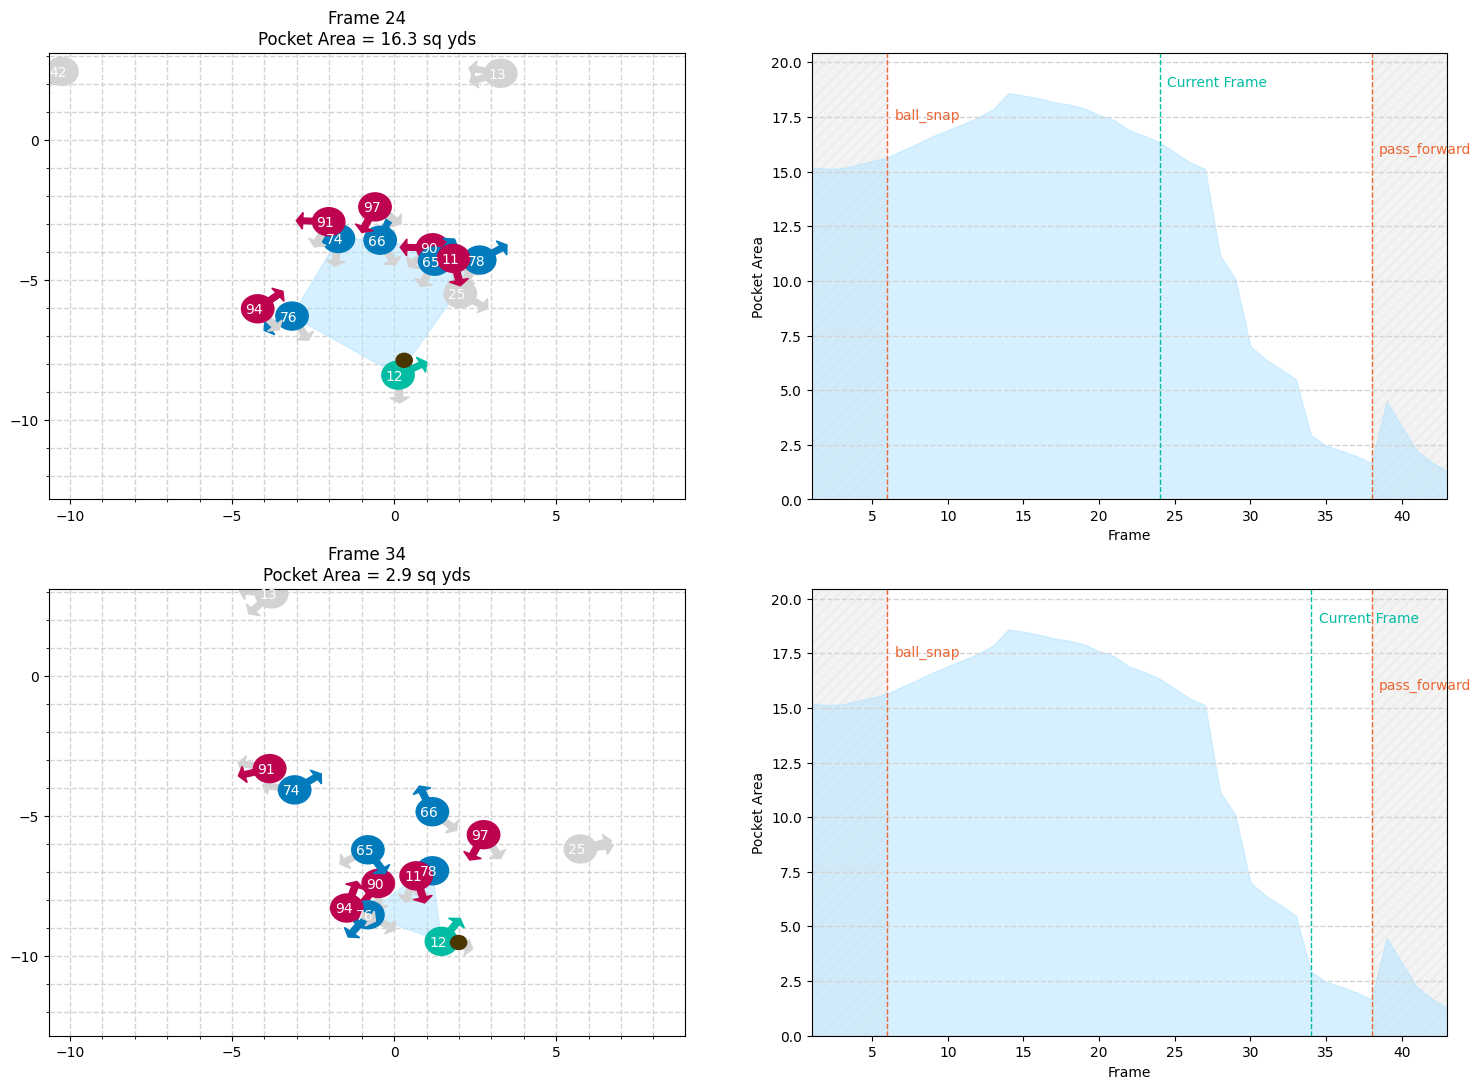

In [9]:
play_query = "gameId == 2021090900 and playId == 97"
plot_play_frame, viz_info = get_play_pocket_and_timeline_plotter_multiple(
    df_tracking.query(play_query),
    df_areas.query(play_query),
)
plot_play_frame(frame0=24, frame1=34, area_method="adaptive_pocket_area")
plt.gcf().savefig(f"{FIGPATH}/figure_03.png")
plt.show()

### Team Rankings

In [10]:
default_area = "adaptive_pocket_area"
formation_query = "'SHOTGUN', 'EMPTY', 'SINGLEBACK', 'I FORM'"
rank_team_scatter = get_team_scatter_ranker(df_play_metrics)
df_team_ranking = rank_team_scatter(default_area, formation_query)
display(df_team_ranking)
# somehow.savetable(f"{FIGPATH}/figure_04.png")

,index,team,plays,median_area,median_time_in_pocket,sack_rate
0,4,CAR,60,18.304700,2.70,0.050000
1,15,KC,47,18.297950,3.00,0.042553
2,11,GB,38,18.242850,3.20,0.105263
3,0,ARI,49,17.843450,3.20,0.061224
4,3,BUF,75,17.534500,3.00,0.053333
5,17,LAC,75,17.299605,2.80,0.053333
6,16,LA,43,17.288550,3.20,0.023256
7,22,NO,41,16.975100,3.10,0.097561
8,23,NYG,68,16.968025,2.90,0.088235
9,31,WAS,60,16.924600,2.80,0.033333


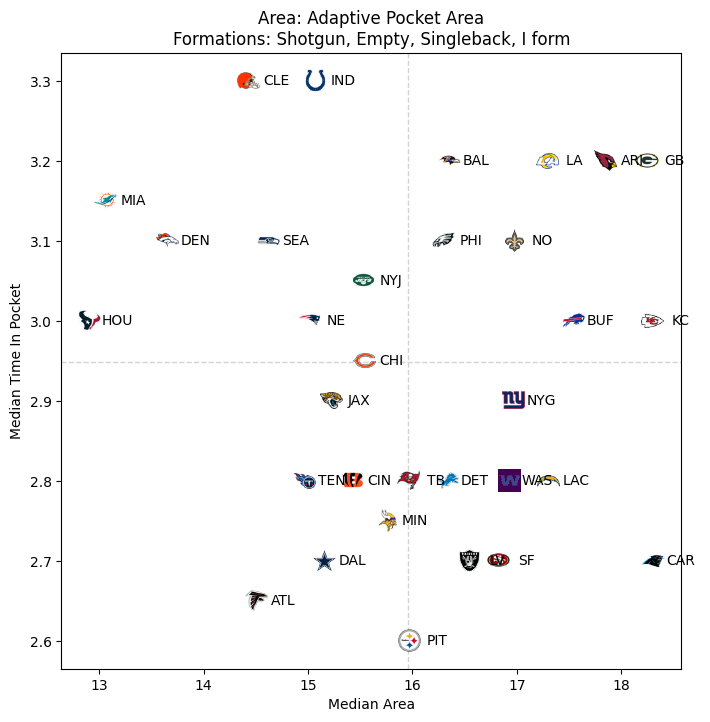

In [11]:
plot_team_scatter = get_team_scatter_plotter(df_play_metrics, team_logos)
plot_team_scatter(default_area, formation_query, "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/figure_05.png")
plt.show()

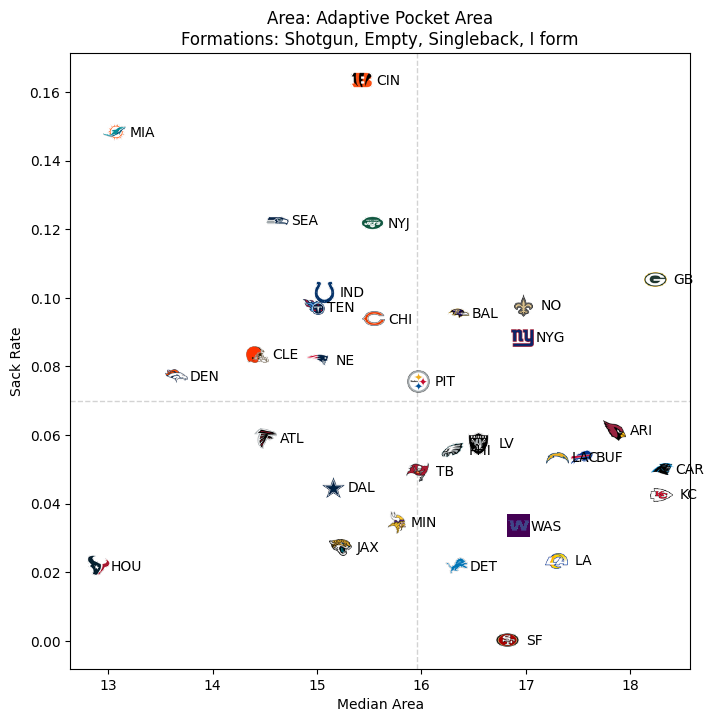

In [12]:
plot_team_scatter(default_area, formation_query, "median_area", "sack_rate")
plt.gcf().savefig(f"{FIGPATH}/figure_06.png")
plt.show()

In [13]:
# plot_team_scatter(default_area, formation_query, "median_area", "median_opponent_area")
# plt.gcf().savefig(f"{FIGPATH}/figure_07.png")
# plt.show()

### Heatmaps

In [14]:
from matplotlib.patches import Polygon as PolygonPatch
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.metrics.pocket_area.helpers import vertices_from_shape
from src.visualization.heatmaps import (
    get_pocket_shapes_for_area,
    get_play_pocket,
    get_heatmap_from_pocket_shapes,
)

In [15]:
show_cols = [
    "gameId",
    "playId",
    "frameId",
    "method",
    "possessionTeam",
    "down",
    "yardsToGo",
]
df_pocket = get_play_pocket(df_play_metrics, df_areas, df_plays)
df_pocket[show_cols].head(10)

,gameId,playId,frameId,method,possessionTeam,down,yardsToGo
0,2021090900,97,18,adaptive_pocket_area,TB,3,2
2,2021090900,137,12,adaptive_pocket_area,DAL,1,10
4,2021090900,187,6,adaptive_pocket_area,DAL,2,6
6,2021090900,282,18,adaptive_pocket_area,DAL,1,10
8,2021090900,349,12,adaptive_pocket_area,DAL,3,15
10,2021090900,456,11,adaptive_pocket_area,TB,2,10
12,2021090900,480,20,adaptive_pocket_area,TB,1,10
14,2021090900,509,13,adaptive_pocket_area,TB,1,10
16,2021090900,559,10,adaptive_pocket_area,TB,2,7
18,2021090900,583,6,adaptive_pocket_area,TB,1,5


In [16]:
heatmap_query = (
    "gameId == 2021090900 "
    "and possessionTeam == 'TB' "
    "and down == 3 "
    "and yardsToGo >= 6 "
)
df_pocket_query = df_pocket.query(heatmap_query)

In [17]:
pocket_shapes = get_pocket_shapes_for_area(df_pocket_query, default_area)

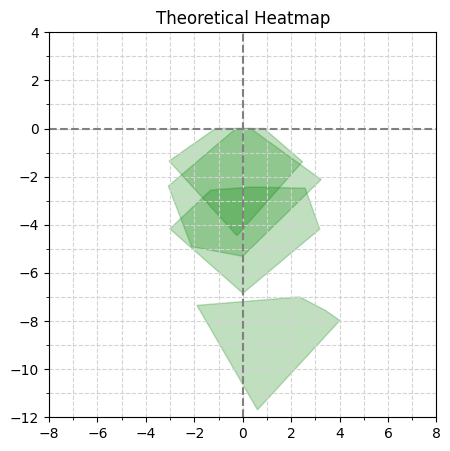

In [18]:
fig, ax = plt.subplots(1, 1)

alpha = 1.0 / len(pocket_shapes)
for shape in pocket_shapes:
    vertices = vertices_from_shape(shape)
    patch = PolygonPatch(vertices, color="green", alpha=alpha)
    ax.add_patch(patch)

ax.set_title("Theoretical Heatmap")
ax.set_xlim(-8, 8)
ax.set_ylim(-12, 4)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

In [19]:
bin_size = 0.25
heatmap, extent = get_heatmap_from_pocket_shapes(
    pocket_shapes,
    bin_start=-10,
    bin_end=10,
    bin_size=bin_size,
    progress=True,
)

  0%|          | 0/6561 [00:00<?, ?it/s]

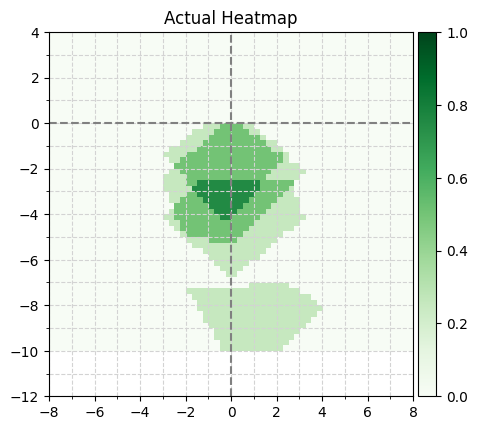

In [20]:
fig, ax = plt.subplots(1, 1)

im = ax.imshow(
    heatmap,
    extent=extent,
    cmap="Greens",
    vmin=0,
    vmax=1,
    origin="lower"
)

# Colorbar on ax code based on : https://stackoverflow.com/a/49037495
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, orientation="vertical")

ax.set_title("Actual Heatmap")
ax.set_xlim(-8, 8)
ax.set_ylim(-12, 4)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

### Appendix

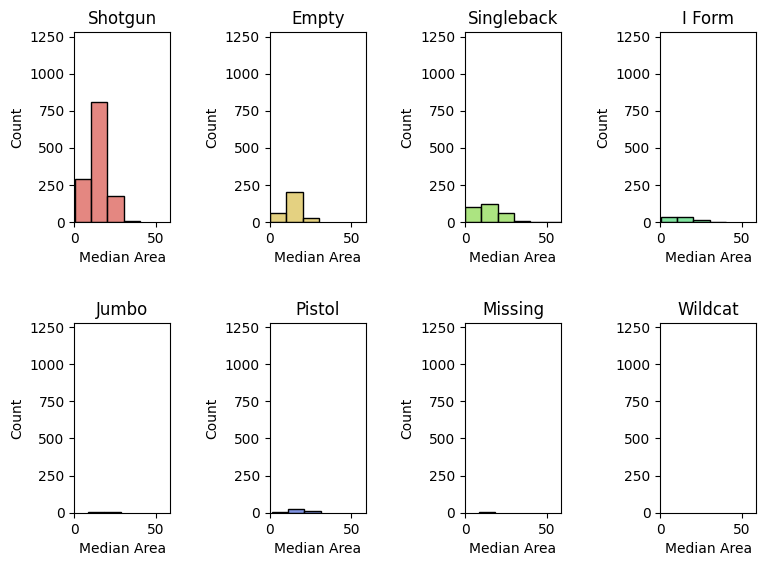

In [25]:
formations = list(df_play_metrics["offenseFormation"].unique())
plot_all_formation_distributions = get_all_formation_distributions_plotter(df_play_metrics, formations)
plot_all_formation_distributions(default_area)
plt.gcf().savefig(f"{FIGPATH}/appendix_01.png")
plt.show()

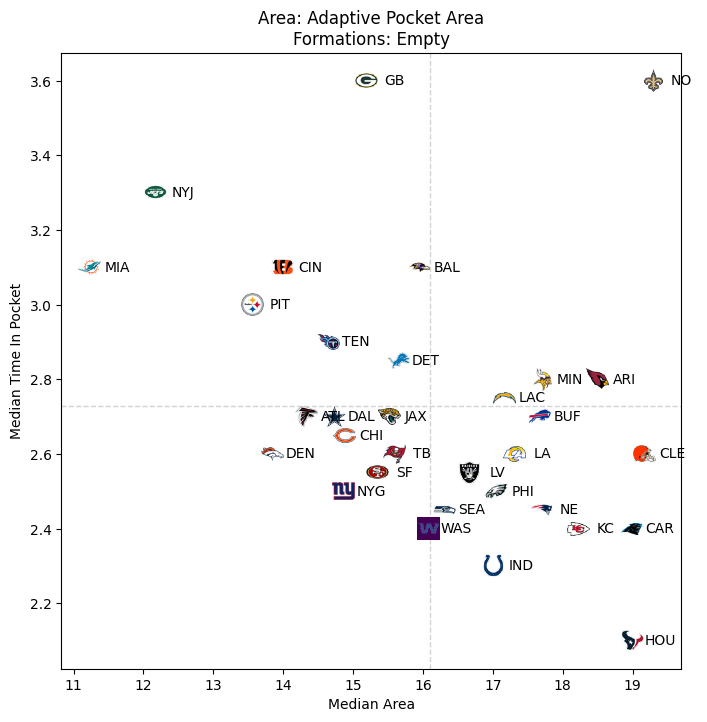

In [26]:
plot_team_scatter(default_area, "'EMPTY'", "median_area", "median_time_in_pocket")
plt.gcf().savefig(f"{FIGPATH}/appendix_02.png")
plt.show()